In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
#Question no: 01
data = pd.read_csv('transaction_anomalies_dataset.csv')
print(data.isnull().sum())
print(data.info())
print(data.describe())


Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week     

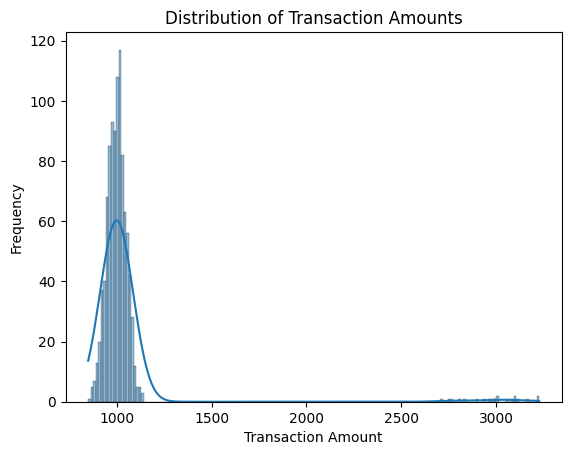

In [19]:
#question no: 02
sns.histplot(data['Transaction_Amount'], kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

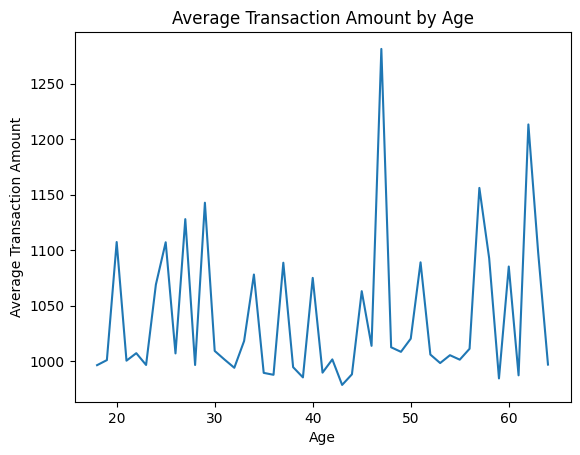

In [20]:
#question no: 03
# Average transaction amount by age
average_transaction_by_age = data.groupby('Age')['Transaction_Amount'].mean()
plt.plot(average_transaction_by_age)
plt.title('Average Transaction Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Transaction Amount')
plt.show()


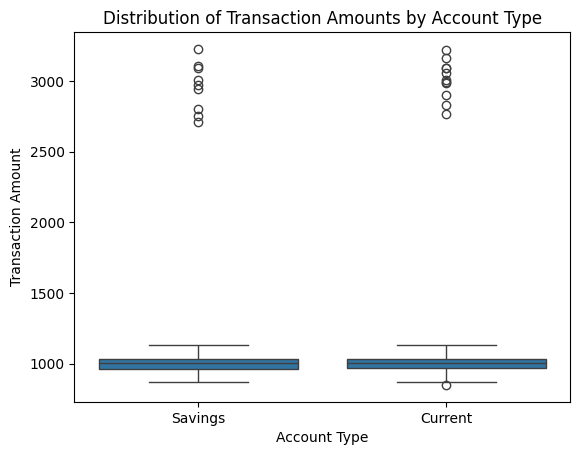

In [21]:
#question no: 04
# Distribution of transaction amounts by account type
sns.boxplot(x='Account_Type', y='Transaction_Amount', data=data)
plt.title('Distribution of Transaction Amounts by Account Type')
plt.xlabel('Account Type')
plt.ylabel('Transaction Amount')
plt.show()


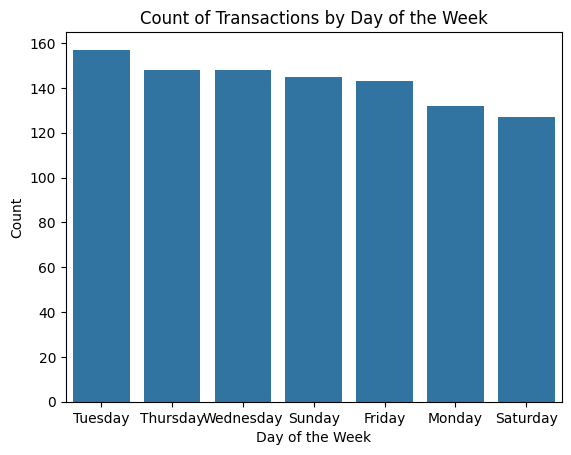

In [22]:
#question no: 05
# Count of transactions by day of the week
transactions_by_day = data['Day_of_Week'].value_counts()
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values)
plt.title('Count of Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

Non-numeric columns: Index(['Transaction_ID', 'Day_of_Week', 'Time_of_Day', 'Gender',
       'Account_Type'],
      dtype='object')
Remaining non-numeric columns: Index([], dtype='object')


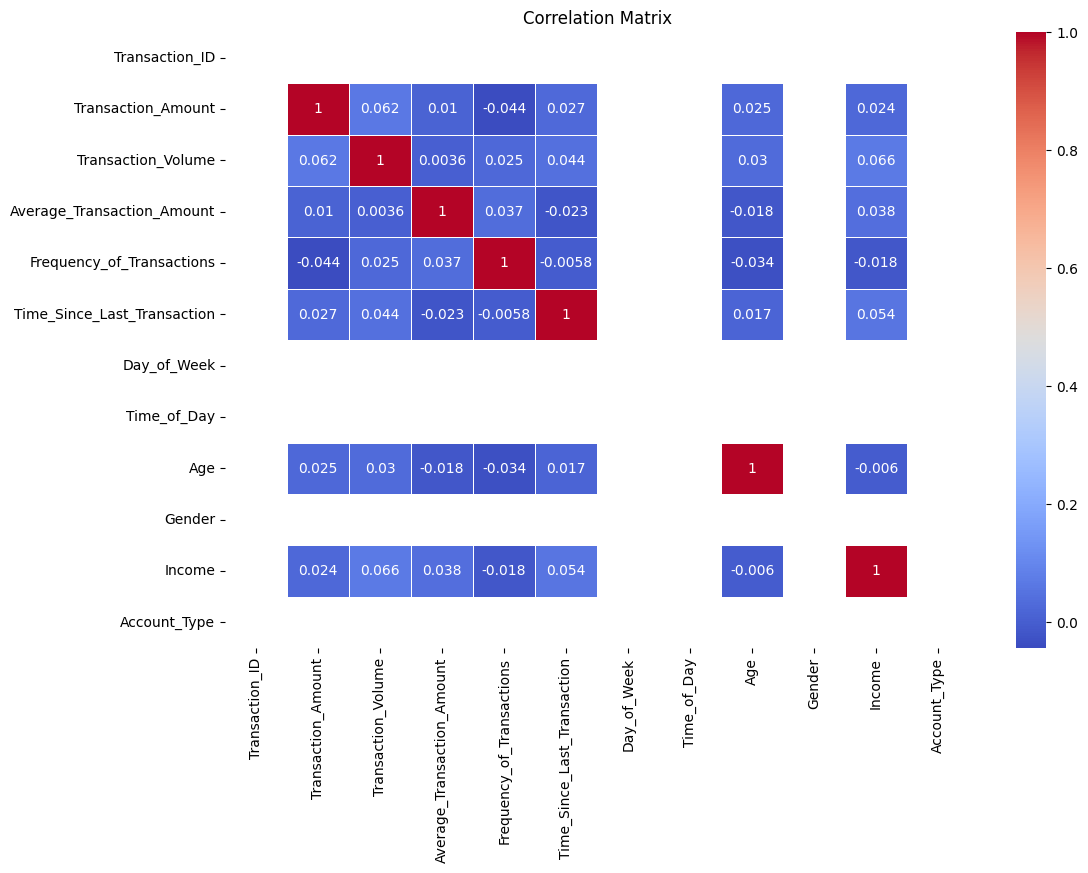

In [29]:
#question no: 06
# Correlation matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('transaction_anomalies_dataset.csv')
numeric_columns = data.select_dtypes(include=['number']).columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns: {non_numeric_columns}")
for col in non_numeric_columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except:
        print(f"Could not convert column {col} to numeric")
numeric_columns = data.select_dtypes(include=['number']).columns
remaining_non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(f"Remaining non-numeric columns: {remaining_non_numeric_columns}")

correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [24]:
# Select relevant features for anomaly detection
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']

# Fit the Isolation Forest model
model = IsolationForest(contamination=0.05)
data['Anomaly'] = model.fit_predict(data[features])

# Convert predictions to binary values (1: anomaly, 0: normal)
data['Anomaly'] = data['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Calculate the number of anomalies and the ratio
num_anomalies = data['Anomaly'].sum()
ratio_anomalies = num_anomalies / len(data)
print(f'Number of anomalies: {num_anomalies}')
print(f'Ratio of anomalies: {ratio_anomalies}')


Number of anomalies: 50
Ratio of anomalies: 0.05


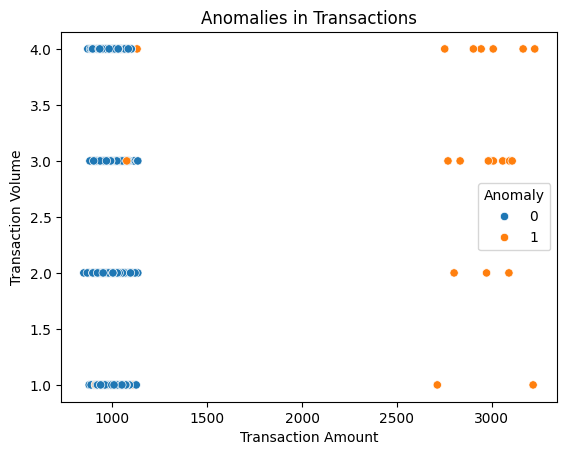

In [25]:
#question no: 08
# Visualize anomalies in the data
sns.scatterplot(x='Transaction_Amount', y='Transaction_Volume', hue='Anomaly', data=data)
plt.title('Anomalies in Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Volume')
plt.show()


In [26]:
#question no: 09
# Classification report
true_labels = [0 if x == 0 else 1 for x in data['Anomaly']]
predicted_labels = model.fit_predict(data[features])
predicted_labels = [0 if x == 1 else 1 for x in predicted_labels]

print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       950
           1       0.80      0.80      0.80        50

    accuracy                           0.98      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.98      0.98      0.98      1000



In [27]:
#question no: 10
# Using the trained model to detect anomalies
data['New_Anomaly'] = model.predict(data[features])
data['New_Anomaly'] = data['New_Anomaly'].apply(lambda x: 1 if x == -1 else 0)
print(data[['Transaction_ID', 'New_Anomaly']])


    Transaction_ID  New_Anomaly
0              TX0            0
1              TX1            0
2              TX2            0
3              TX3            0
4              TX4            0
..             ...          ...
995          TX995            0
996          TX996            0
997          TX997            0
998          TX998            0
999          TX999            0

[1000 rows x 2 columns]


In [34]:
import pandas as pd
from sklearn.ensemble import IsolationForest

features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 
            'Frequency_of_Transactions', 'Time_Since_Last_Transaction', 'Age', 'Income']
missing_features = [feature for feature in features if feature not in data.columns]
if missing_features:
    print(f"Missing features: {missing_features}")
else:
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(data[features])
   
    new_data = {
        'Transaction_Amount': 10000,
        'Average_Transaction_Amount': 900,
        'Frequency_of_Transactions': 6,
        'Transaction_Volume': 10000, 
        'Time_Since_Last_Transaction': 1, 
        'Age': 30, 
        'Income': 50000 
    }
    
    # Create DataFrame for the new data
    new_data_df = pd.DataFrame([new_data])
    print(new_data_df)
    
    prediction = model.predict(new_data_df[features])
    print(prediction)
    is_anomaly = 1 if prediction[0] == -1 else 0
    if is_anomaly:
        print("Anomaly detected: This transaction is flagged as an anomaly.")
    else:
        print("This transaction is not flagged as an anomaly.")


   Transaction_Amount  Average_Transaction_Amount  Frequency_of_Transactions  \
0               10000                         900                          6   

   Transaction_Volume  Time_Since_Last_Transaction  Age  Income  
0               10000                            1   30   50000  
[-1]
Anomaly detected: This transaction is flagged as an anomaly.
